# Data Sources

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
wine_reviews = pd.read_csv("./data/winemag-data-130k-v2.csv", index_col=0)
wine_reviews

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


# Transform into a form suitable for mining association rules

In [2]:
minsup = 1200

In [3]:
country_filter_reviews = wine_reviews.groupby('country').filter(lambda x: len(x) >= minsup)
country_reviews = country_filter_reviews.groupby('country').country.count().sort_values()
country_reviews

country
South Africa     1401
New Zealand      1419
Germany          2165
Australia        2329
Austria          3345
Argentina        3800
Chile            4472
Portugal         5691
Spain            6645
Italy           19540
France          22093
US              54504
Name: country, dtype: int64

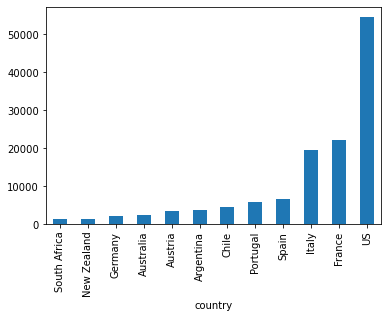

In [4]:
country_reviews.plot.bar()

In [5]:
country_max = 12

In [6]:
def judge_country(country):
    if country == 'US':
        return 1
    elif country == 'France':
        return 2
    elif country == 'Italy':
        return 3
    elif country == 'Spain':
        return 4
    elif country == 'Portugal':
        return 5
    elif country == 'Chile':
        return 6
    elif country == 'Argentina':
        return 7
    elif country == 'Austria':
        return 8
    elif country == 'Australia':
        return 9
    elif country == 'Germany':
        return 10
    elif country == 'New Zealand':
        return 11
    elif country == 'South Africa':
        return 12
    else:
        return 0

wine_reviews['country_trans'] = wine_reviews['country'].apply(judge_country)

In [7]:
designation_filter_reviews = wine_reviews.groupby('designation').filter(lambda x: len(x) >= minsup)
designation_reviews = designation_filter_reviews.groupby('designation').designation.count().sort_values()
designation_reviews

designation
Reserva    1259
Estate     1322
Reserve    2009
Name: designation, dtype: int64

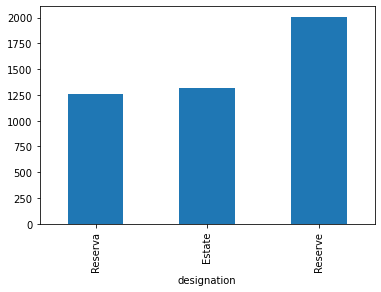

In [8]:
designation_reviews.plot.bar()

In [9]:
designation_max = 3

In [10]:
def judge_designation(designation):
    if designation == 'Reserve':
        return 1
    elif designation == 'Estate':
        return 2
    elif designation == 'Reserva':
        return 3
    else:
        return 0

wine_reviews['designation_trans'] = wine_reviews['designation'].apply(judge_designation)

In [11]:
province_filter_reviews = wine_reviews.groupby('province').filter(lambda x: len(x) >= minsup)
province_reviews = province_filter_reviews.groupby('province').province.count().sort_values()
province_reviews

province
Central Italy          1233
Douro                  1281
Provence               1346
Southern Italy         1349
South Australia        1349
Southwest France       1503
Champagne              1613
Sicily & Sardinia      1797
Loire Valley           1856
Northeastern Italy     2138
Alsace                 2440
New York               2688
Veneto                 2716
Mendoza Province       3264
Piedmont               3729
Northern Spain         3851
Burgundy               3980
Oregon                 5373
Tuscany                5897
Bordeaux               5941
Washington             8639
California            36247
Name: province, dtype: int64

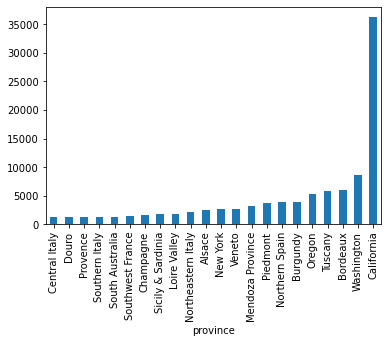

In [12]:
province_reviews.plot.bar()

In [13]:
province_max = 22

In [14]:
def judge_province(province):
    if province == 'California':
        return 1
    elif province == 'Washington':
        return 2
    elif province == 'Bordeaux':
        return 3
    elif province == 'Tuscany':
        return 4
    elif province == 'Oregon':
        return 5
    elif province == 'Burgundy':
        return 6
    elif province == 'Northern Spain':
        return 7
    elif province == 'Piedmont':
        return 8
    elif province == 'Mendoza Province':
        return 9
    elif province == 'Veneto':
        return 10
    elif province == 'New York':
        return 11
    elif province == 'Alsace':
        return 12
    elif province == 'Northeastern Italy':
        return 13
    elif province == 'Loire Valley':
        return 14
    elif province == 'Sicily & Sardinia':
        return 15
    elif province == 'Champagne':
        return 16
    elif province == 'Southwest France':
        return 17
    elif province == 'South Australia':
        return 18
    elif province == 'Southern Italy':
        return 19
    elif province == 'Provence':
        return 20
    elif province == 'Douro':
        return 21
    elif province == 'Central Italy':
        return 22
    else:
        return 0

wine_reviews['province_trans'] = wine_reviews['province'].apply(judge_province)

In [15]:
region_1_filter_reviews = wine_reviews.groupby('region_1').filter(lambda x: len(x) >= minsup)
region_1_reviews = region_1_filter_reviews.groupby('region_1').region_1.count().sort_values()
region_1_reviews

region_1
Sonoma County             1246
Rioja                     1469
Brunello di Montalcino    1470
Sonoma Coast              1474
Finger Lakes              1565
Barolo                    1599
Champagne                 1613
Alsace                    2163
Mendoza                   2301
Willamette Valley         2301
Paso Robles               2350
California                2629
Russian River Valley      3091
Columbia Valley (WA)      4124
Napa Valley               4480
Name: region_1, dtype: int64

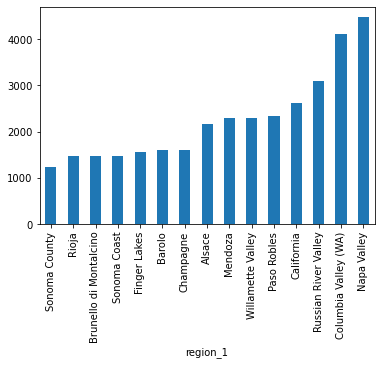

In [16]:
region_1_reviews.plot.bar()

In [17]:
region_1_max = 15

In [18]:
def judge_region_1(region_1):
    if region_1 == 'Napa Valley':
        return 1
    elif region_1 == 'Columbia Valley (WA)':
        return 2
    elif region_1 == 'Russian River Valley':
        return 3
    elif region_1 == 'California':
        return 4
    elif region_1 == 'Paso Robles':
        return 5
    elif region_1 == 'Mendoza':
        return 6
    elif region_1 == 'Willamette Valley':
        return 7
    elif region_1 == 'Alsace':
        return 8
    elif region_1 == 'Champagne':
        return 9
    elif region_1 == 'Barolo':
        return 10
    elif region_1 == 'Finger Lakes':
        return 11
    elif region_1 == 'Sonoma Coast':
        return 12
    elif region_1 == 'Brunello di Montalcino':
        return 13
    elif region_1 == 'Rioja':
        return 14
    elif region_1 == 'Sonoma County':
        return 15    
    else:
        return 0

wine_reviews['region_1_trans'] = wine_reviews['region_1'].apply(judge_region_1)

In [19]:
region_2_filter_reviews = wine_reviews.groupby('region_2').filter(lambda x: len(x) >= minsup)
region_2_reviews = region_2_filter_reviews.groupby('region_2').region_2.count().sort_values()
region_2_reviews

region_2
Sierra Foothills      1462
Finger Lakes          1777
California Other      2663
Willamette Valley     3423
Napa                  6814
Columbia Valley       8103
Sonoma                9028
Central Coast        11065
Name: region_2, dtype: int64

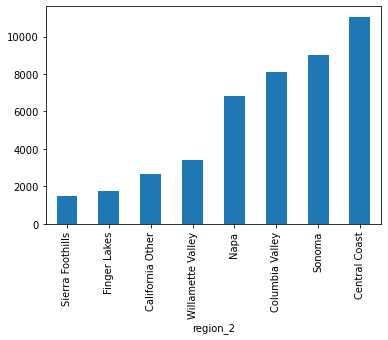

In [20]:
region_2_reviews.plot.bar()

In [21]:
region_2_max = 8

In [22]:
def judge_region_2(region_2):
    if region_2 == 'Central Coast':
        return 1
    elif region_2 == 'Sonoma':
        return 2
    elif region_2 == 'Columbia Valley':
        return 3
    elif region_2 == 'Napa':
        return 4
    elif region_2 == 'Willamette Valley':
        return 5
    elif region_2 == 'California Other':
        return 6
    elif region_2 == 'Finger Lakes':
        return 7
    elif region_2 == 'Sierra Foothills':
        return 8
    else:
        return 0

wine_reviews['region_2_trans'] = wine_reviews['region_2'].apply(judge_region_2)

In [23]:
taster_name_filter_reviews = wine_reviews.groupby('taster_name').filter(lambda x: len(x) >= minsup)
taster_name_reviews = taster_name_filter_reviews.groupby('taster_name').taster_name.count().sort_values()
taster_name_reviews

taster_name
Lauren Buzzeo          1835
Anne Krebiehl MW       3685
Jim Gordon             4177
Anna Lee C. Iijima     4415
Sean P. Sullivan       4966
Joe Czerwinski         5147
Matt Kettmann          6332
Paul Gregutt           9532
Virginie Boone         9537
Kerin O’Keefe         10776
Michael Schachner     15134
Roger Voss            25514
Name: taster_name, dtype: int64

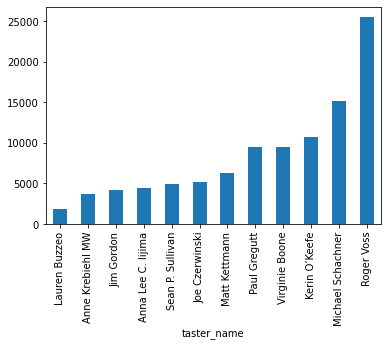

In [24]:
taster_name_reviews.plot.bar()

In [25]:
taster_name_max = 12

In [26]:
def judge_taster_name(taster_name):
    if taster_name == 'Roger Voss':
        return 1
    elif taster_name == 'Michael Schachner':
        return 2
    elif taster_name == 'Kerin O’Keefe':
        return 3
    elif taster_name == 'Virginie Boone':
        return 4
    elif taster_name == 'Paul Gregutt':
        return 5
    elif taster_name == 'Matt Kettmann':
        return 6
    elif taster_name == 'Joe Czerwinski':
        return 7
    elif taster_name == 'Sean P. Sullivan':
        return 8
    elif taster_name == 'Anna Lee C. Iijima':
        return 9
    elif taster_name == 'Jim Gordon':
        return 10
    elif taster_name == 'Anne Krebiehl MW':
        return 11
    elif taster_name == 'Lauren Buzzeo':
        return 12
    else:
        return 0

wine_reviews['taster_name_trans'] = wine_reviews['taster_name'].apply(judge_taster_name)

In [27]:
taster_twitter_handle_filter_reviews = wine_reviews.groupby('taster_twitter_handle').filter(lambda x: len(x) >= minsup)
taster_twitter_handle_reviews = taster_twitter_handle_filter_reviews.groupby('taster_twitter_handle').taster_twitter_handle.count().sort_values()
taster_twitter_handle_reviews

taster_twitter_handle
@laurbuzz            1835
@AnneInVino          3685
@gordone_cellars     4177
@wawinereport        4966
@JoeCz               5147
@mattkettmann        6332
@paulgwine           9532
@vboone              9537
@kerinokeefe        10776
@wineschach         15134
@vossroger          25514
Name: taster_twitter_handle, dtype: int64

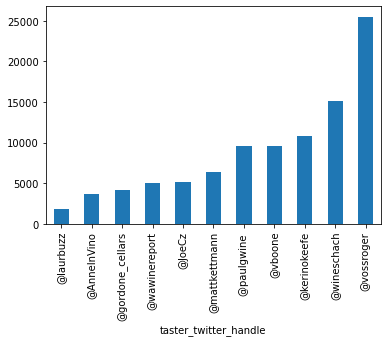

In [28]:
taster_twitter_handle_reviews.plot.bar()

In [29]:
taster_twitter_handle_max = 11

In [30]:
def judge_taster_twitter_handle(taster_twitter_handle):
    if taster_twitter_handle == '@vossroger':
        return 1
    elif taster_twitter_handle == '@wineschach':
        return 2
    elif taster_twitter_handle == '@kerinokeefe':
        return 3
    elif taster_twitter_handle == '@vboone':
        return 4
    elif taster_twitter_handle == '@paulgwine':
        return 5
    elif taster_twitter_handle == '@mattkettmann':
        return 6
    elif taster_twitter_handle == '@JoeCz':
        return 7
    elif taster_twitter_handle == '@wawinereport':
        return 8
    elif taster_twitter_handle == '@gordone_cellars':
        return 9
    elif taster_twitter_handle == '@AnneInVino':
        return 10
    elif taster_twitter_handle == '@laurbuzz':
        return 11
    else:
        return 0

wine_reviews['taster_twitter_handle_trans'] = wine_reviews['taster_twitter_handle'].apply(judge_taster_twitter_handle)

In [31]:
variety_filter_reviews = wine_reviews.groupby('variety').filter(lambda x: len(x) >= minsup)
variety_reviews = variety_filter_reviews.groupby('variety').variety.count().sort_values()
variety_reviews

variety
Grüner Veltliner             1345
Cabernet Franc               1353
Champagne Blend              1396
Pinot Gris                   1455
Rhône-style Red Blend        1471
Tempranillo                  1810
Sparkling Blend              2153
White Blend                  2360
Portuguese Red               2466
Malbec                       2652
Sangiovese                   2707
Zinfandel                    2714
Nebbiolo                     2804
Merlot                       3102
Rosé                         3564
Syrah                        4142
Sauvignon Blanc              4967
Riesling                     5189
Bordeaux-style Red Blend     6915
Red Blend                    8946
Cabernet Sauvignon           9472
Chardonnay                  11753
Pinot Noir                  13272
Name: variety, dtype: int64

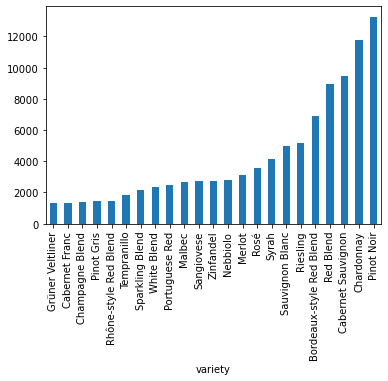

In [32]:
variety_reviews.plot.bar()

In [33]:
variety_max = 23

In [34]:
def judge_variety(variety):
    if variety == 'Pinot Noir':
        return 1
    elif variety == 'Chardonnay':
        return 2
    elif variety == 'Cabernet Sauvignon':
        return 3
    elif variety == 'Red Blend':
        return 4
    elif variety == 'Bordeaux-style Red Blend':
        return 5
    elif variety == 'Riesling':
        return 6
    elif variety == 'Sauvignon Blanc':
        return 7
    elif variety == 'Syrah':
        return 8
    elif variety == 'Rosé':
        return 9
    elif variety == 'Merlot':
        return 10
    elif variety == 'Nebbiolo':
        return 11
    elif variety == 'Zinfandel':
        return 12
    elif variety == 'Sangiovese':
        return 13
    elif variety == 'Malbec':
        return 14
    elif variety == 'Portuguese Red':
        return 15
    elif variety == 'White Blend':
        return 16
    elif variety == 'Sparkling Blend':
        return 17
    elif variety == 'Tempranillo':
        return 18
    elif variety == 'Rhône-style Red Blend':
        return 19
    elif variety == 'Pinot Gris':
        return 20
    elif variety == 'Champagne Blend':
        return 21
    elif variety == 'Cabernet Franc':
        return 22
    elif variety == 'Grüner Veltliner':
        return 23
    else:
        return 0

wine_reviews['variety_trans'] = wine_reviews['variety'].apply(judge_variety)

In [35]:
wine_reviews.groupby('description').winery.count().sort_values()

description
"Chremisa," the ancient name of Krems, is commemorated in this wine that comes from Krems vineyards. It has tight, tangy apple-driven acidity, with a bright, light, citrusy character. Not for aging.                                                                                                           1
The clean packaging of this Aglianico rosé from Basilicata is beautiful and so are the wine's delicate aromas of pink grapefruit, raspberry and rose. This is a highly drinkable wine with rich fruit flavors and an easy, no-fuss approach.                                                                     1
The clean look, nice bead and good mouthfeel are the saving graces here, because it smells strange, almost like steamed ballpark hot dogs, and it tastes odd and innocuous, like papaya juice. The look and feel are good but the smell and tastes are not so great.                                             1
The clay soil of Pouilly gives extra richness to this wine, a cream

In [36]:
wine_reviews.groupby('title').winery.count().sort_values()

title
1+1=3 2008 Rosé Cabernet Sauvignon (Penedès)                                    1
Monticello Vineyards 2007 Jefferson Cuvée Cabernet Sauvignon (Napa Valley)      1
Monticello Vineyards 2006 Estate Grown Merlot (Oak Knoll District)              1
Monticello Vineyards 2005 Estate Syrah (Oak Knoll District)                     1
Monticello Vineyards 2004 Tietjen Vineyard Cabernet Sauvignon (Napa Valley)     1
                                                                               ..
Gloria Ferrer NV Blanc de Noirs Sparkling (Carneros)                            7
Segura Viudas NV Aria Estate Extra Dry Sparkling (Cava)                         7
Segura Viudas NV Extra Dry Sparkling (Cava)                                     8
Korbel NV Brut Sparkling (California)                                           9
Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma County)                         11
Name: winery, Length: 118840, dtype: int64

In [37]:
wine_reviews.groupby('winery').winery.count().sort_values()

winery
Hayward by Folin Cellars      1
Château de Targé              1
Château de Sérame             1
Novella                       1
Now Presenting...             1
                           ... 
Louis Latour                199
Williams Selyem             211
DFJ Vinhos                  215
Testarossa                  218
Wines & Winemakers          222
Name: winery, Length: 16757, dtype: int64

In [38]:
points_25 = np.percentile(wine_reviews.points, (25))
points_25

86.0

In [39]:
points_50 = np.percentile(wine_reviews.points, (50))
points_50

88.0

In [40]:
points_75 = np.percentile(wine_reviews.points, (75))
points_75

91.0

In [41]:
points_max = 4

In [42]:
def judge_points(points):
    if points >= points_75:
        return 1
    elif points >= points_50:
        return 2
    elif points >= points_25:
        return 3
    else:
        return 4

wine_reviews['points_trans'] = wine_reviews['points'].apply(judge_points)

In [43]:
price_25 = np.percentile(wine_reviews.loc[wine_reviews.price >= 0 ].price, (25))
price_25

17.0

In [44]:
price_50 = np.percentile(wine_reviews.loc[wine_reviews.price >= 0 ].price, (50))
price_50

25.0

In [45]:
price_75 = np.percentile(wine_reviews.loc[wine_reviews.price >= 0 ].price, (75))
price_75

42.0

In [46]:
price_max = 4

In [47]:
def judge_price(price):
    if price >= price_75:
        return 1
    elif price >= price_50:
        return 2
    elif price >= price_25:
        return 3
    else:
        return 4

wine_reviews['price_trans'] = wine_reviews['price'].apply(judge_price)

# Transform result

In [48]:
wine_reviews_trans = wine_reviews.loc[: , ['country_trans','designation_trans','province_trans','region_1_trans','region_2_trans','taster_name_trans','taster_twitter_handle_trans','variety_trans','points_trans','price_trans']]
wine_reviews_trans

,country_trans,designation_trans,province_trans,region_1_trans,region_2_trans,taster_name_trans,taster_twitter_handle_trans,variety_trans,points_trans,price_trans
0,3,0,15,0,0,3,3,16,3,4
1,5,0,21,0,0,1,1,15,3,4
2,1,0,5,7,5,5,0,20,3,4
3,1,0,0,0,0,0,0,6,3,4
4,1,0,5,7,5,5,0,1,3,1
...,...,...,...,...,...,...,...,...,...,...
129966,10,0,0,0,0,9,0,6,2,2
129967,1,0,5,0,0,5,0,1,2,1
129968,2,0,12,8,0,1,1,0,2,2
129969,2,0,12,8,0,1,1,20,2,2


# Find out frequent patterns

In [49]:
aprout = [([0] * designation_max) for i in range(country_max)]
for num1 in range(1,country_max+1):
    for num2 in range(1,designation_max+1):
        apr = wine_reviews_trans[(wine_reviews_trans['country_trans'] == num1) & (wine_reviews_trans['designation_trans'] == num2)] 
        if len(apr.index) >= minsup:
            aprout[num1 - 1][num2 - 1] = len(apr.index)
aprout

[[1485, 1210, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0]]

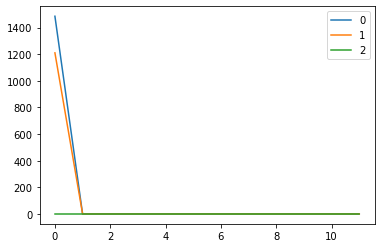

In [50]:
aprout_df = pd.DataFrame(aprout)
aprout_df.plot.line()

In [51]:
supp_US_and_Reserve = 1485/129971
conf_US_to_Reserve = 1485/54504
conf_Reserve_to_US = 1485/2009
lift_US_and_Reserve = (1485/129971)/((54504/129971)*(2009/129971))
allconf_US_and_Reserve = 1485/54504
supp_US_and_Reserve,conf_US_to_Reserve,conf_Reserve_to_US,lift_US_and_Reserve,allconf_US_and_Reserve

(0.01142562571650599,
 0.02724570673712021,
 0.7391737182677949,
 1.7626439772674223,
 0.02724570673712021)

In [52]:
supp_US_and_Estate = 1210/129971
conf_US_to_Estate = 1210/54504
conf_Estate_to_US = 1210/1322
lift_US_and_Estate = (1210/129971)/((54504/129971)*(1322/129971))
allconf_US_and_Estate = 1210/54504
supp_US_and_Estate,conf_US_to_Estate,conf_Estate_to_US,lift_US_and_Estate,allconf_US_and_Estate

(0.009309769102338213,
 0.022200205489505357,
 0.9152798789712556,
 2.1825891888627087,
 0.022200205489505357)

In [53]:
aprout = [([0] * taster_name_max) for i in range(country_max)]
for num1 in range(1,country_max+1):
    for num2 in range(1,taster_name_max+1):
        apr = wine_reviews_trans[(wine_reviews_trans['country_trans'] == num1) & (wine_reviews_trans['taster_name_trans'] == num2)] 
        if len(apr.index) >= minsup:
            aprout[num1 - 1][num2 - 1] = len(apr.index)
aprout

[[0, 0, 0, 9537, 9303, 6331, 0, 4934, 2435, 4177, 0, 0],
 [18602, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 10776, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 6575, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [5658, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 4337, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 3797, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 2036, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1759, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1311, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

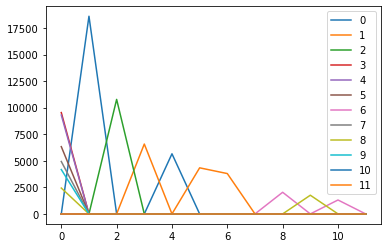

In [54]:
aprout_df = pd.DataFrame(aprout)
aprout_df.plot.line()

In [55]:
aprout = [([0] * variety_max) for i in range(country_max)]
for num1 in range(1,country_max+1):
    for num2 in range(1,variety_max+1):
        apr = wine_reviews_trans[(wine_reviews_trans['country_trans'] == num1) & (wine_reviews_trans['variety_trans'] == num2)] 
        if len(apr.index) >= minsup:
            aprout[num1 - 1][num2 - 1] = len(apr.index)
aprout

[[9885,
  6801,
  7315,
  2972,
  1824,
  1753,
  2163,
  3244,
  0,
  2311,
  0,
  2711,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [1966,
  2808,
  0,
  0,
  4725,
  0,
  0,
  0,
  1923,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1243,
  0,
  0],
 [0,
  0,
  0,
  3624,
  0,
  0,
  0,
  0,
  0,
  0,
  2736,
  0,
  2265,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1429, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2466, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1510, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1234],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1790, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0,

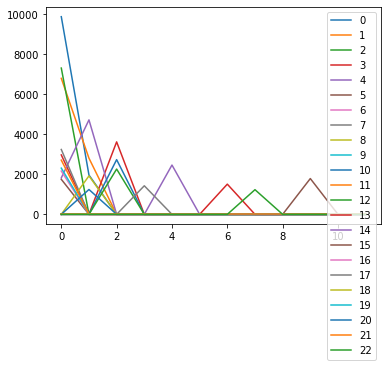

In [56]:
aprout_df = pd.DataFrame(aprout)
aprout_df.plot.line()

In [57]:
aprout = [([0] * points_max) for i in range(country_max)]
for num1 in range(1,country_max+1):
    for num2 in range(1,points_max+1):
        apr = wine_reviews_trans[(wine_reviews_trans['country_trans'] == num1) & (wine_reviews_trans['points_trans'] == num2)] 
        if len(apr.index) >= minsup:
            aprout[num1 - 1][num2 - 1] = len(apr.index)
aprout

[[15617, 18163, 11558, 9166],
 [6654, 7565, 4618, 3256],
 [4265, 7761, 5509, 2005],
 [0, 2000, 1727, 1870],
 [1383, 1822, 1328, 0],
 [0, 0, 1372, 1614],
 [0, 0, 0, 1435],
 [1439, 1420, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0]]

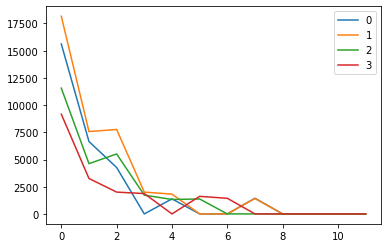

In [58]:
aprout_df = pd.DataFrame(aprout)
aprout_df.plot.line()

In [59]:
aprout = [([0] * price_max) for i in range(country_max)]
for num1 in range(1,country_max+1):
    for num2 in range(1,price_max+1):
        apr = wine_reviews_trans[(wine_reviews_trans['country_trans'] == num1) & (wine_reviews_trans['price_trans'] == num2)] 
        if len(apr.index) >= minsup:
            aprout[num1 - 1][num2 - 1] = len(apr.index)
aprout

[[16289, 19251, 10765, 8199],
 [4597, 4380, 4298, 8818],
 [5489, 4278, 3936, 5837],
 [0, 1240, 1495, 2914],
 [0, 0, 0, 3254],
 [0, 0, 0, 2610],
 [0, 0, 0, 1876],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0]]

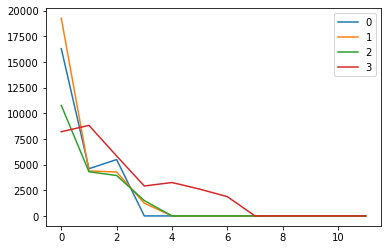

In [60]:
aprout_df = pd.DataFrame(aprout)
aprout_df.plot.line()

In [61]:
aprout = [([0] * taster_name_max) for i in range(designation_max)]
for num1 in range(1,designation_max+1):
    for num2 in range(1,taster_name_max+1):
        apr = wine_reviews_trans[(wine_reviews_trans['designation_trans'] == num1) & (wine_reviews_trans['taster_name_trans'] == num2)] 
        if len(apr.index) >= minsup:
            aprout[num1 - 1][num2 - 1] = len(apr.index)
aprout

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [62]:
aprout = [([0] * variety_max) for i in range(designation_max)]
for num1 in range(1,designation_max+1):
    for num2 in range(1,variety_max+1):
        apr = wine_reviews_trans[(wine_reviews_trans['designation_trans'] == num1) & (wine_reviews_trans['variety_trans'] == num2)] 
        if len(apr.index) >= minsup:
            aprout[num1 - 1][num2 - 1] = len(apr.index)
aprout

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [63]:
aprout = [([0] * points_max) for i in range(designation_max)]
for num1 in range(1,designation_max+1):
    for num2 in range(1,points_max+1):
        apr = wine_reviews_trans[(wine_reviews_trans['designation_trans'] == num1) & (wine_reviews_trans['points_trans'] == num2)] 
        if len(apr.index) >= minsup:
            aprout[num1 - 1][num2 - 1] = len(apr.index)
aprout

[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]

In [64]:
aprout = [([0] * price_max) for i in range(designation_max)]
for num1 in range(1,designation_max+1):
    for num2 in range(1,price_max+1):
        apr = wine_reviews_trans[(wine_reviews_trans['designation_trans'] == num1) & (wine_reviews_trans['price_trans'] == num2)] 
        if len(apr.index) >= minsup:
            aprout[num1 - 1][num2 - 1] = len(apr.index)
aprout

[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]

In [65]:
aprout = [([0] * variety_max) for i in range(taster_name_max)]
for num1 in range(1,taster_name_max+1):
    for num2 in range(1,variety_max+1):
        apr = wine_reviews_trans[(wine_reviews_trans['taster_name_trans'] == num1) & (wine_reviews_trans['variety_trans'] == num2)] 
        if len(apr.index) >= minsup:
            aprout[num1 - 1][num2 - 1] = len(apr.index)
aprout

[[1872,
  2786,
  0,
  0,
  4710,
  0,
  0,
  0,
  1803,
  0,
  0,
  0,
  0,
  0,
  2462,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  1358,
  1496,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1652,
  0,
  0,
  0,
  1439,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  2507,
  0,
  0,
  0,
  0,
  0,
  0,
  1930,
  0,
  1584,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [1891,
  1429,
  1829,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [2721, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1570, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 2135, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

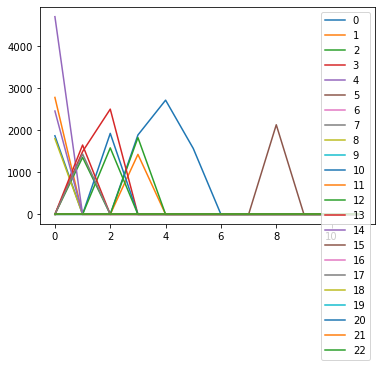

In [66]:
aprout_df = pd.DataFrame(aprout)
aprout_df.plot.line()

In [67]:
aprout = [([0] * points_max) for i in range(taster_name_max)]
for num1 in range(1,taster_name_max+1):
    for num2 in range(1,points_max+1):
        apr = wine_reviews_trans[(wine_reviews_trans['taster_name_trans'] == num1) & (wine_reviews_trans['points_trans'] == num2)] 
        if len(apr.index) >= minsup:
            aprout[num1 - 1][num2 - 1] = len(apr.index)
aprout

[[7378, 8533, 5505, 4098],
 [1980, 4139, 4025, 4990],
 [2374, 4970, 2816, 0],
 [3284, 3562, 1620, 0],
 [3096, 3616, 1832, 0],
 [2977, 2242, 0, 0],
 [1317, 1941, 0, 0],
 [1333, 2131, 0, 0],
 [0, 1869, 0, 0],
 [0, 1658, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0]]

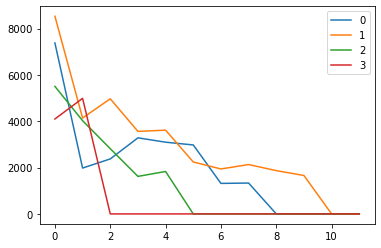

In [68]:
aprout_df = pd.DataFrame(aprout)
aprout_df.plot.line()

In [69]:
aprout = [([0] * price_max) for i in range(taster_name_max)]
for num1 in range(1,taster_name_max+1):
    for num2 in range(1,price_max+1):
        apr = wine_reviews_trans[(wine_reviews_trans['taster_name_trans'] == num1) & (wine_reviews_trans['price_trans'] == num2)] 
        if len(apr.index) >= minsup:
            aprout[num1 - 1][num2 - 1] = len(apr.index)
aprout

[[4710, 4627, 4670, 11507],
 [1808, 2463, 3476, 7387],
 [3472, 2763, 2265, 2276],
 [4331, 3149, 1435, 0],
 [2510, 3560, 2104, 1358],
 [2301, 2508, 0, 0],
 [0, 0, 1327, 1558],
 [1269, 1971, 0, 0],
 [0, 1244, 1307, 1262],
 [0, 1318, 0, 1295],
 [0, 0, 0, 0],
 [0, 0, 0, 0]]

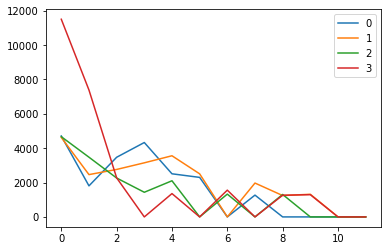

In [70]:
aprout_df = pd.DataFrame(aprout)
aprout_df.plot.line()

In [71]:
aprout = [([0] * points_max) for i in range(variety_max)]
for num1 in range(1,variety_max+1):
    for num2 in range(1,points_max+1):
        apr = wine_reviews_trans[(wine_reviews_trans['variety_trans'] == num1) & (wine_reviews_trans['points_trans'] == num2)] 
        if len(apr.index) >= minsup:
            aprout[num1 - 1][num2 - 1] = len(apr.index)
aprout

[[5331, 4105, 2297, 1539],
 [3180, 3590, 2592, 2391],
 [2882, 2864, 1987, 1739],
 [1984, 3561, 2158, 1243],
 [2395, 2329, 1233, 0],
 [1811, 2028, 0, 0],
 [0, 1735, 1380, 1211],
 [1605, 1351, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [1247, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0]]

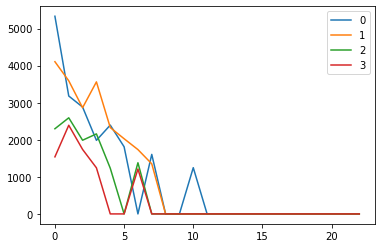

In [72]:
aprout_df = pd.DataFrame(aprout)
aprout_df.plot.line()

In [73]:
aprout = [([0] * price_max) for i in range(variety_max)]
for num1 in range(1,variety_max+1):
    for num2 in range(1,price_max+1):
        apr = wine_reviews_trans[(wine_reviews_trans['variety_trans'] == num1) & (wine_reviews_trans['price_trans'] == num2)] 
        if len(apr.index) >= minsup:
            aprout[num1 - 1][num2 - 1] = len(apr.index)
aprout

[[6613, 3798, 1493, 1368],
 [2583, 3668, 2313, 3189],
 [4101, 2301, 1267, 1803],
 [2264, 2730, 1854, 2098],
 [1841, 1513, 0, 2534],
 [0, 1357, 1428, 1535],
 [0, 0, 1659, 2146],
 [1336, 1804, 0, 0],
 [0, 0, 0, 1965],
 [0, 0, 0, 0],
 [1785, 0, 0, 0],
 [0, 1278, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 1334],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0]]

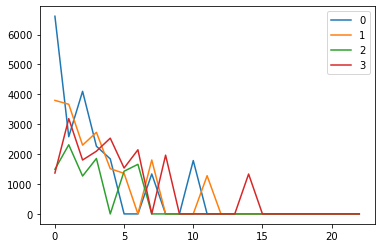

In [74]:
aprout_df = pd.DataFrame(aprout)
aprout_df.plot.line()

In [75]:
aprout = [([0] * price_max) for i in range(points_max)]
for num1 in range(1,points_max+1):
    for num2 in range(1,price_max+1):
        apr = wine_reviews_trans[(wine_reviews_trans['points_trans'] == num1) & (wine_reviews_trans['price_trans'] == num2)] 
        if len(apr.index) >= minsup:
            aprout[num1 - 1][num2 - 1] = len(apr.index)
aprout

[[18344, 9426, 2757, 3108],
 [9188, 14618, 11383, 9654],
 [2591, 6679, 7867, 12396],
 [0, 3675, 4815, 12487]]

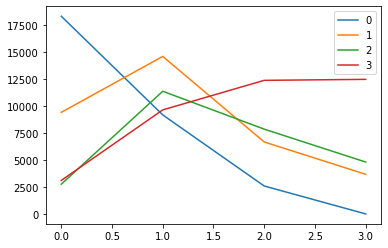

In [76]:
aprout_df = pd.DataFrame(aprout)
aprout_df.plot.line()

# Result analysis